<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-imdb-series-dataset?scriptVersionId=133432575" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-series-dataset/imdb_series.csv


In [2]:
df = pd.read_csv('/kaggle/input/imdb-series-dataset/imdb_series.csv')
df.head()

,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.0,NaN,12.0


In [3]:
df.describe()

,rating,votes
count,7766.000000,7766.000000
mean,7.397901,292.342519
std,0.840942,660.399773
min,1.800000,5.000000
25%,7.000000,25.000000
50%,7.500000,77.000000
75%,8.000000,188.000000
max,9.700000,9501.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ranking    9400 non-null   object 
 1   title      9400 non-null   object 
 2   year       9400 non-null   object 
 3   duration   6585 non-null   object 
 4   genre      6585 non-null   object 
 5   rating     7766 non-null   float64
 6   directors  900 non-null    object 
 7   votes      7766 non-null   float64
dtypes: float64(2), object(6)
memory usage: 587.6+ KB


In [5]:
df.dtypes

ranking       object
title         object
year          object
duration      object
genre         object
rating       float64
directors     object
votes        float64
dtype: object

In [6]:
df.shape

(9400, 8)

In [7]:
df.isnull().sum()

ranking         0
title           0
year            0
duration     2815
genre        2815
rating       1634
directors    8500
votes        1634
dtype: int64

In [8]:
df['rating'] = df['rating'].fillna(value = df['rating'].mean())

In [9]:
df['votes'] = df['votes'].fillna(value = df['votes'].mean())

In [10]:
df.isnull().sum()

ranking         0
title           0
year            0
duration     2815
genre        2815
rating          0
directors    8500
votes           0
dtype: int64

In [11]:
df.head()

,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,7.397901,NaN,292.342519
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,7.397901,NaN,292.342519
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,7.397901,NaN,292.342519
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,7.397901,NaN,292.342519
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.000000,NaN,12.000000


In [12]:
df = df.drop(['directors'],axis=1)

In [13]:
df.head()

,ranking,title,year,duration,genre,rating,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,7.397901,292.342519
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,7.397901,292.342519
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,7.397901,292.342519
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,7.397901,292.342519
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.000000,12.000000


In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

ranking     0
title       0
year        0
duration    0
genre       0
rating      0
votes       0
dtype: int64

In [16]:
df.shape

(6585, 7)

In [17]:
df.head()

,ranking,title,year,duration,genre,rating,votes
11,"5,417.",Counterstrike,(1990–1993),60 min,"Action, Adventure",7.397901,292.342519
64,"5,930.",The Detectives,(1959–1962),60 min,"Action, Crime, Drama",7.100000,11.000000
65,"5,931.",The Detectives,(1959–1962),60 min,"Action, Crime, Drama",7.800000,10.000000
66,"5,932.",The Detectives,(1959–1962),60 min,"Action, Crime, Drama",7.500000,7.000000
67,"5,933.",The Detectives,(1959–1962),30 min,"Action, Crime, Drama",7.200000,5.000000


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'votes'}>]], dtype=object)

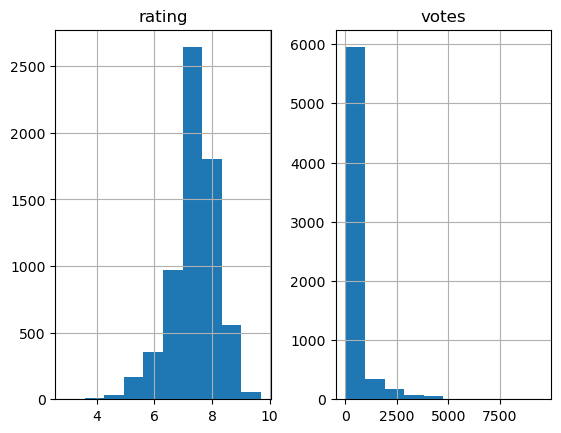

In [18]:
df.hist()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(4.944444444444445, 0.5, 'Count')

<Figure size 2000x1600 with 0 Axes>

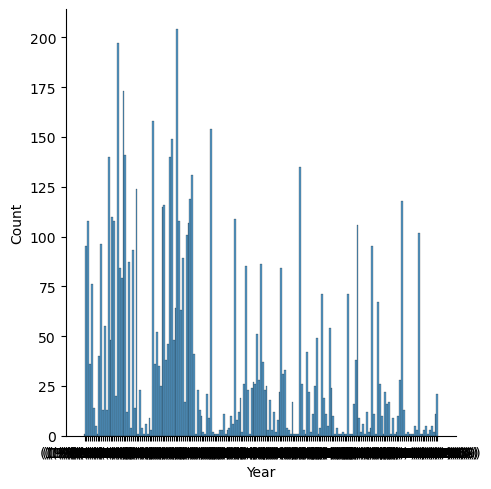

In [20]:
plt.figure(figsize=(20,16))
# df['year'].hist()
sns.displot(df['year'])
plt.xlabel('Year')
plt.ylabel('Count')